In [1]:
import numpy as np 
import pandas as pd 
import cv2
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator


import os
for dirname, _, filenames in os.walk('/home/prostoi/Загрузки/Kataracta'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

2023-03-14 22:12:29.104587: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


/home/prostoi/Загрузки/Kataracta/full_df.csv
/home/prostoi/Загрузки/Kataracta/ODIR-5K/ODIR-5K/data.xlsx
/home/prostoi/Загрузки/Kataracta/ODIR-5K/ODIR-5K/Testing Images/3547_right.jpg
/home/prostoi/Загрузки/Kataracta/ODIR-5K/ODIR-5K/Testing Images/3495_right.jpg
/home/prostoi/Загрузки/Kataracta/ODIR-5K/ODIR-5K/Testing Images/3447_right.jpg
/home/prostoi/Загрузки/Kataracta/ODIR-5K/ODIR-5K/Testing Images/4733_left.jpg
/home/prostoi/Загрузки/Kataracta/ODIR-5K/ODIR-5K/Testing Images/3538_left.jpg
/home/prostoi/Загрузки/Kataracta/ODIR-5K/ODIR-5K/Testing Images/1997_left.jpg
/home/prostoi/Загрузки/Kataracta/ODIR-5K/ODIR-5K/Testing Images/4700_right.jpg
/home/prostoi/Загрузки/Kataracta/ODIR-5K/ODIR-5K/Testing Images/1312_left.jpg
/home/prostoi/Загрузки/Kataracta/ODIR-5K/ODIR-5K/Testing Images/3481_right.jpg
/home/prostoi/Загрузки/Kataracta/ODIR-5K/ODIR-5K/Testing Images/1511_left.jpg
/home/prostoi/Загрузки/Kataracta/ODIR-5K/ODIR-5K/Testing Images/1341_left.jpg
/home/prostoi/Загрузки/Kataracta/

In [2]:
df = pd.read_csv("/home/prostoi/Загрузки/Kataracta/full_df.csv")
df.head(3)

def has_cataract(text):
    if "cataract" in text:
        return 1
    else:
        return 0

In [3]:
df.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


In [4]:
df["left_cataract"] = df["Left-Diagnostic Keywords"].apply(lambda x: has_cataract(x))
df["right_cataract"] = df["Right-Diagnostic Keywords"].apply(lambda x: has_cataract(x))

left_cataract = df.loc[(df.C ==1) & (df.left_cataract == 1)]["Left-Fundus"].values
left_cataract[:15]

right_cataract = df.loc[(df.C ==1) & (df.right_cataract == 1)]["Right-Fundus"].values
right_cataract[:15]

array(['24_right.jpg', '81_right.jpg', '112_right.jpg', '188_right.jpg',
       '218_right.jpg', '345_right.jpg', '354_right.jpg', '477_right.jpg',
       '553_right.jpg', '560_right.jpg', '625_right.jpg', '726_right.jpg',
       '769_right.jpg', '949_right.jpg', '955_right.jpg'], dtype=object)

In [5]:
print("Number of images in left cataract: {}".format(len(left_cataract)))
print("Number of images in right cataract: {}".format(len(right_cataract)))

Number of images in left cataract: 304
Number of images in right cataract: 290


In [6]:
left_normal = df.loc[(df.C ==0) & (df["Left-Diagnostic Keywords"] == "normal fundus")]["Left-Fundus"].sample(250,random_state=42).values
right_normal = df.loc[(df.C ==0) & (df["Right-Diagnostic Keywords"] == "normal fundus")]["Right-Fundus"].sample(250,random_state=42).values
right_normal[:15]

cataract = np.concatenate((left_cataract,right_cataract),axis=0)
normal = np.concatenate((left_normal,right_normal),axis=0)

In [7]:
print(len(cataract),len(normal))

594 500


In [8]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array
dataset_dir = "/home/prostoi/Загрузки/Kataracta/preprocessed_images"
image_size=224
labels = []
dataset = []
def create_dataset(image_category,label):
    for img in tqdm(image_category):
        image_path = os.path.join(dataset_dir,img)
        try:
            image = cv2.imread(image_path,cv2.IMREAD_COLOR)
            image = cv2.resize(image,(image_size,image_size))
        except:
            continue
        
        dataset.append([np.array(image),np.array(label)])
    random.shuffle(dataset)
    return dataset

In [9]:
dataset = create_dataset(cataract,1)
len(dataset)

dataset = create_dataset(normal,0)
len(dataset)

 22%|██▏       | 132/594 [00:00<00:01, 271.17it/s][ WARN:0@7.490] global /croot/opencv-suite_1676452025216/work/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('/home/prostoi/Загрузки/Kataracta/preprocessed_images/2231_left.jpg'): can't open/read file: check file path/integrity
[ WARN:0@7.533] global /croot/opencv-suite_1676452025216/work/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('/home/prostoi/Загрузки/Kataracta/preprocessed_images/2244_left.jpg'): can't open/read file: check file path/integrity
[ WARN:0@7.543] global /croot/opencv-suite_1676452025216/work/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('/home/prostoi/Загрузки/Kataracta/preprocessed_images/2251_left.jpg'): can't open/read file: check file path/integrity
100%|██████████| 500/500 [00:01<00:00, 258.07it/s]


1088

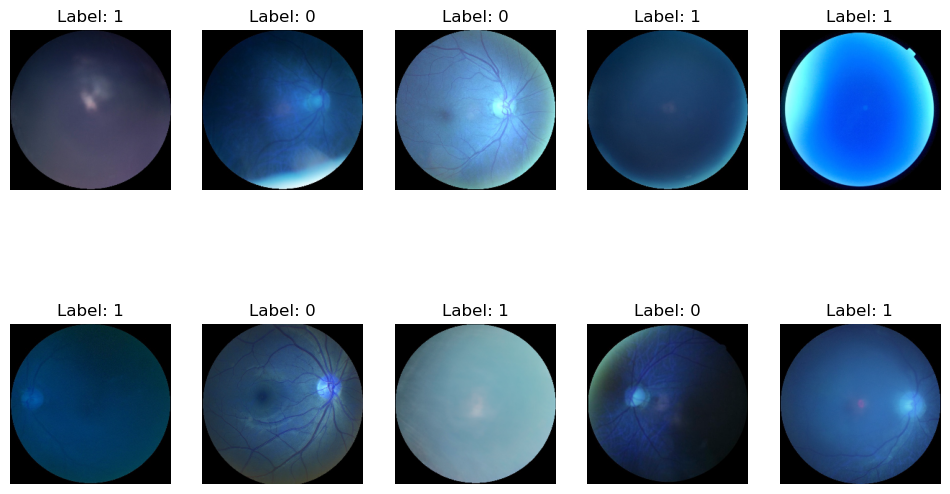

In [10]:
plt.figure(figsize=(12,7))
for i in range(10):
    sample = random.choice(range(len(dataset)))
    plt.subplot(2,5,i+1)
    image = dataset[sample][0]
    plt.imshow(image)
    plt.axis("off")
    label = dataset[sample][1]
    plt.title("Label: {}".format(label))
plt.show()

In [11]:
x = np.array([i[0] for i in dataset]).reshape(-1,image_size,image_size,3)
y = np.array([i[1] for i in dataset])

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [13]:
from tensorflow.keras.models import Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense, Conv2D, BatchNormalization, Dropout
from tensorflow.keras.applications import ResNet50

resnet = ResNet50(weights="imagenet", input_shape=(224, 224, 3), include_top=False)

2023-03-14 22:12:45.459446: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-14 22:12:45.460542: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [14]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [15]:
for layer in resnet.layers:
    layer.trainable = False

In [16]:
from tensorflow.keras.layers import Dropout, Conv2D, BatchNormalization
x = Flatten() (resnet.output)
x = Dropout(0.5)(x) 
x = BatchNormalization()(x) 
prediction = Dense(1, activation = 'relu')(x)
model = Model(inputs = resnet.input, outputs = prediction)

In [17]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [33]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train,batch_size=64,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
14/14 [==============================] - 60s 4s/step - loss: 1.0434 - accuracy: 0.9299 - val_loss: 0.7805 - val_accuracy: 0.9495
Epoch 2/10
14/14 [==============================] - 58s 4s/step - loss: 1.0120 - accuracy: 0.9333 - val_loss: 0.7060 - val_accuracy: 0.9541
Epoch 3/10
14/14 [==============================] - 58s 4s/step - loss: 1.0948 - accuracy: 0.9287 - val_loss: 0.9882 - val_accuracy: 0.9358
Epoch 4/10
14/14 [==============================] - 57s 4s/step - loss: 0.9723 - accuracy: 0.9368 - val_loss: 0.9882 - val_accuracy: 0.9358
Epoch 5/10
14/14 [==============================] - 58s 4s/step - loss: 1.1858 - accuracy: 0.9218 - val_loss: 1.0589 - val_accuracy: 0.9312
Epoch 6/10
14/14 [==============================] - 57s 4s/step - loss: 1.0799 - accuracy: 0.9287 - val_loss: 1.0589 - val_accuracy: 0.9312
Epoch 7/10
14/14 [==============================] - 59s 4s/step - loss: 0.9926 - accuracy: 0.9345 - val_loss: 0.9907 - val_accuracy: 0.9358
Epoch 8/10
14/14 [==

In [35]:
loss,accuracy = model.evaluate(x_test,y_test)
print("loss:",loss)
print("Accuracy:",accuracy)

7/7 [==============================] - 11s 2s/step - loss: 0.9890 - accuracy: 0.9358
loss: 0.9889810085296631
Accuracy: 0.9357798099517822


In [36]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [37]:
y_pred = model.predict(x_test)

y_pred = (y_pred > 0.5).astype(int)

7/7 [==============================] - 11s 2s/step


In [38]:
accuracy_score(y_test,y_pred)

0.9357798165137615

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       106
           1       0.98      0.89      0.93       112

    accuracy                           0.94       218
   macro avg       0.94      0.94      0.94       218
weighted avg       0.94      0.94      0.94       218



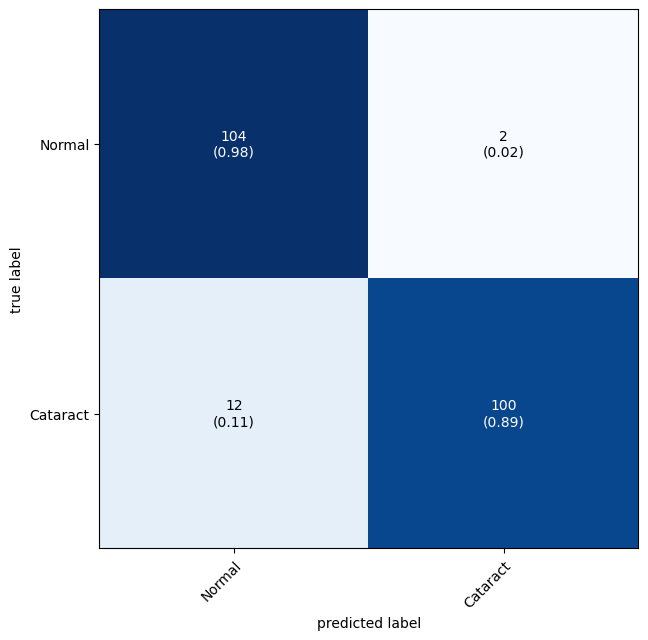

In [40]:
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat = cm,figsize=(8,7),class_names = ["Normal","Cataract"],
                      show_normed = True);

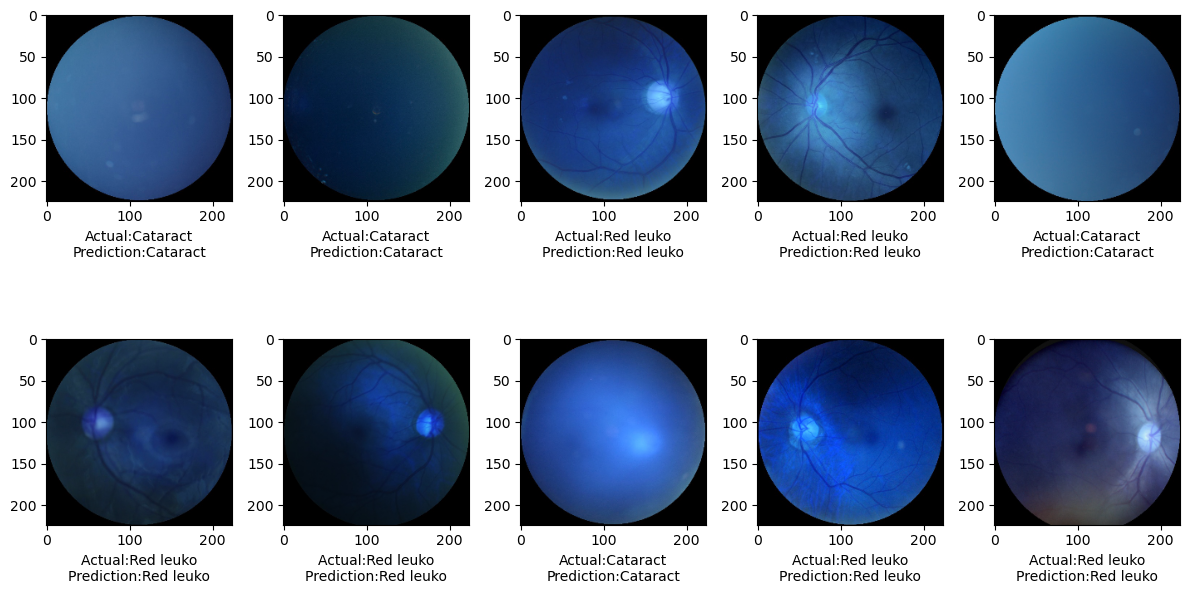

In [41]:
plt.figure(figsize=(12,7))
for i in range(10):
    sample = random.choice(range(len(x_test)))
    image = x_test[sample]
    category = y_test[sample]
    pred_category = y_pred[sample]
    
    if category== 0:
        label = "Red leuko"
    else:
        label = "Cataract"
        
    if pred_category== 0:
        pred_label = "Red leuko"
    else:
        pred_label = "Cataract"
        
    plt.subplot(2,5,i+1)
    plt.imshow(image)
    plt.xlabel("Actual:{}\nPrediction:{}".format(label,pred_label))
plt.tight_layout() 

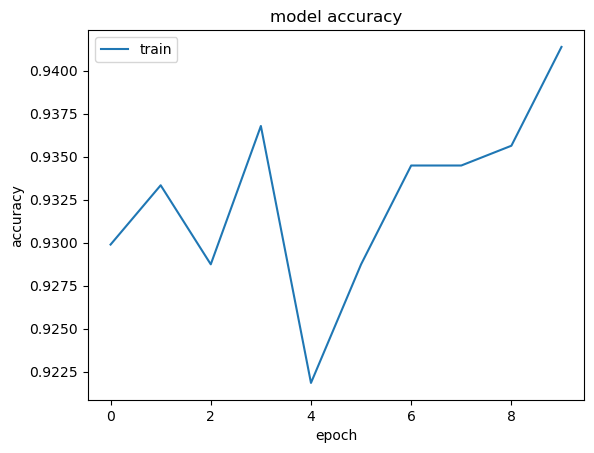

In [44]:
plt.plot(history.history['accuracy'])
plt.title("model accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc = 'upper left')
plt.show()

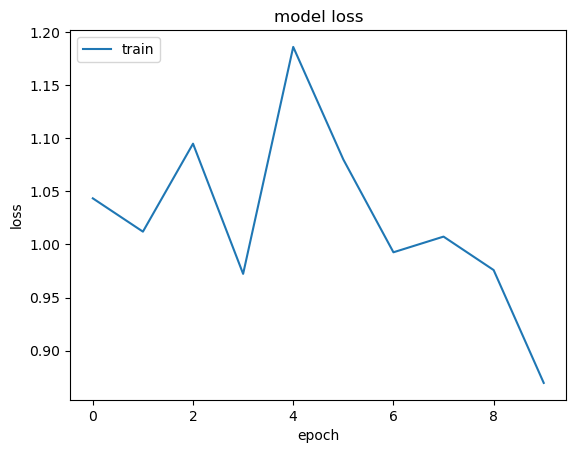

In [45]:
plt.plot(history.history['loss'])
plt.title("model loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc = 'upper left')
plt.show()